<h1> DS102 Project - An analysis on the possible risk factors of stroke </h1>
 
<h2> Project Team 3 </h2>
 
 
<h3> Team Members </h3><br>
1. Chong Jia Zhi<br>
2. Raine Wong Chin Weng<br>
3. Ng Chek Khau<br>
4. Tan Xing Rong, James<br>
5. Ang Heng Yi
 
 
<h3> Date: 15 Apr 2021 </h3>

<h2> Problem Statement </h2>

According to WHO, stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths worldwide. In this project, we seek to uncover the various risk factors that may contribute to a greater possibility of a stroke to spread awareness on how to best prevent stroke early on.

<h2> Project Objective </h2>

We aim to investigate the various risk factors of stroke, namely age, gender, hypertension, heart disease, average glucose level, BMI and smoking status. Through this, we hope to understand the degree to which each of these factors affect the risk of stroke.


<h2> Initial Hypothesis </h2>

A stroke occurs when the blood supply to part of the brain is interrupted or reduced, depriving brain cells of oxygen and nutrients. Based on this reasoning alone, we hypothesise that heart disease is the most important factor affecting the risk of stroke as it specifically affects the blood vessels.

<h2> Dataset </h2>

Our dataset contains various possible risk factors and incidence of stroke for 5000+ patients. Each row in the data provides relevant information about the patient. <br>

There are 12 attributes for each patient in this dataset:

<table>    
<tr>
    <th>Attribute</th><th>Description</th>
</tr>
<tr>
    <td>id</td><td>unique identifier</td>
</tr>  
<tr>
    <td>gender</td><td>"Male", "Female" or "Other"</td>
</tr>  
<tr>
    <td>age</td><td>age of patient</td>
</tr>  
<tr>
    <td>hypertension</td><td>0 if the patient doesn't have hypertension, 1 if the patient has hypertension</td>
</tr>  
<tr>
    <td>heart_disease</td><td>0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease</td>
</tr>
<tr>
    <td>ever_married</td><td>"No" or "Yes"</td>
</tr> 
<tr>
    <td>work_type</td><td>"children", "Govt_jov", "Never_worked", "Private" or "Self-employed"</td>
</tr> 
<tr>
    <td>Residence_type</td><td>"Rural" or "Urban"</td>
</tr> 
<tr>
    <td>avg_glucose_level</td><td>average glucose level in blood</td>
</tr> 
<tr>
    <td>bmi</td><td>body mass index</td>
</tr> 
<tr>
    <td>smoking_status</td><td>"formerly smoked", "never smoked", "smokes" or "Unknown"</td>
</tr> 
<tr>
    <td>stroke</td><td>1 if the patient had a stroke or 0 if not</td>
</tr> 
</table>
     
     
Source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset 

<h2> General Approach </h2>

Of the 11 attributes (excluding the dependent variable - stroke) provided to us, we will select those that we deem are more significant - <b> `gender`, `age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi` and `smoking status` </b> - as they directly affect a patient's physical health. <br>

We will then further investigate each of the seven selected factors using appropriate data visualisations, drawing insights on how they affect the risk of stroke. <br>

Finally, using an appropriate machine learning model, we will use our data to predict, given the same seven input attributes for each patient, whether a patient will suffer a stroke.

<h2> A. Data Preparation </h2>

<h3>I. Importing the relevant libraries</h3>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# For Data Processing & Visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

<h3>II. Importing the data</h3>

In [2]:
data_df = pd.read_csv('healthcare-dataset-stroke-data.csv').drop(labels=['id','ever_married','work_type','Residence_type'], axis=1)
display(data_df)
print('Number of patients (size of data):', data_df.shape[0])
print('Number of selected risk factors (independent variables):', data_df.shape[1]-1)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,166.29,25.6,formerly smoked,0


Number of patients (size of data): 5110
Number of selected risk factors (independent variables): 7


<h2> B. Data Cleaning </h2>

<h3> I. Identifying which columns have missing values </h3>

In [3]:
data_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<h3> II. Filling missing values </h3><br>
NaN values in `bmi` column are replaced with the <b>mean bmi</b>.

In [4]:
data_df = data_df.fillna(data_df.mean())

<h3> III. Identifying unique values of categorical data </h3>

For categorical variables that are not one-hot encoded - `gender`, `smoking_status`

In [5]:
print(data_df['gender'].value_counts())
print()
print(data_df['smoking_status'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


We will not eliminate rows which have ``` ['gender'] == 'Other' ``` or ``` ['smoking_status'] == 'Unknown' ``` yet because their data will be valuable in analysing other risk factors. We will only drop such rows when required.

<h2> C. Visualising the risk factors </h2> 

For the independent variables, we are dealing with both discrete data - `gender`, `hypertension`, `heart_disease`, `smoking status`, and continuous data - `age`, `avg_glucose_level`, `bmi`.

We are also dealing with a binary dependent variable, `stroke`.

<h3> I. Gender Risk </h3> <br>
Using <b>pie chart</b> to investigate the gender proportion for stroke patients.

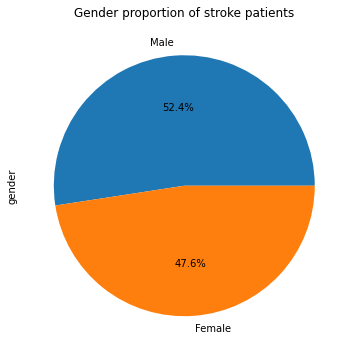

In [6]:
gender_df = data_df[['gender','stroke']]
male_df = gender_df[gender_df['gender']=='Male'] #2115 rows
female_df = gender_df[gender_df['gender']=='Female'] #2994 rows

# To ensure that the sample of patients obtained has equal chance of being male and female
equal_female_df = female_df.sample(n=2115)
equal_gender_df = pd.concat([male_df,equal_female_df])

# Determine counts for each gender among the sample of stroke patients
gender_stroke_ser = equal_gender_df[equal_gender_df['stroke']==1]['gender']
gender_stroke_count = gender_stroke_ser.value_counts()

# Plotting
plt.figure(figsize=(10,6))
gender_stroke_count.plot.pie(title='Gender proportion of stroke patients', autopct='%1.1f%%')
plt.show()

<div class="alert alert-block alert-info">
<b>Insights:</b><br> When running the above code several times for different samples, we note that the proportion of stroke patients who are male is slightly greater.
</div>

<h3> II. Hypertension & Heart Disease Risk </h3>

Using <b>bar chart</b> to investigate, for each illness category (none, `hypertension` only, `heart disease` only, both), the proportion of patients who suffer from stroke.

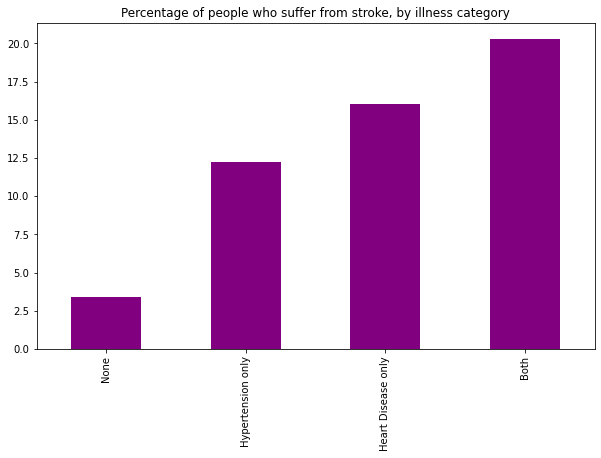

In [7]:
illness_df = data_df[['hypertension', 'heart_disease', 'stroke']]

# Categorising illness status
def illness_sorter(hyper, heart):
    if hyper==heart:
        if hyper == 0:
            return "None"
        else:
            return "Both"
    elif hyper == 1:
        return "Hypertension only"
    else:
        return "Heart Disease only"

illness_df['illness_status'] = illness_df.apply(lambda row: illness_sorter(row['hypertension'], row['heart_disease']),axis=1)

# Determine, for each illness category, the proportion of patients who suffer from stroke
illness_status_stroke_count = illness_df[illness_df['stroke']==1]['illness_status'].value_counts()
illness_status_total_count = illness_df['illness_status'].value_counts()
stroke_proportion_by_illness_status = (illness_status_stroke_count/illness_status_total_count)*100
    
# Plotting
plt.figure(figsize=(10,6))
stroke_proportion_by_illness_status.plot.bar(
    title='Percentage of people who suffer from stroke, by illness category',
    color='purple'
)
plt.show()

<div class="alert alert-block alert-info">
<b>Insights:</b><br> With incidence of hypertension and/or heart disease, the probability of suffering from stroke increases significantly. Moreover, heart disease is a greater risk factor than hypertension, according to this bar chart.
</div>

<h3> III. Smoking Status Risk </h3>

Using <b>bar chart</b> to investigate, for each smoking category (`never smoked`, `formerly smoked`, `smokes`), the proportion of patients who suffer from stroke.

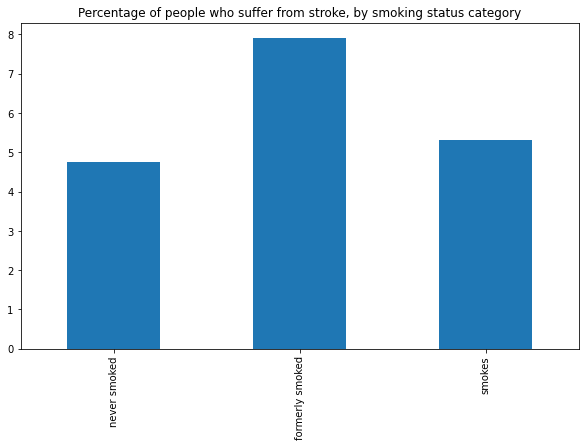

In [8]:
smoking_df = data_df[['smoking_status', 'stroke']]

# we drop rows with smoking_status == 'Unknown'
smoking_df = smoking_df[smoking_df['smoking_status'].isin(['never smoked','formerly smoked','smokes'])]


# Determine, for each smoking category, the proportion who suffer from stroke
smoking_stroke_count = smoking_df[smoking_df['stroke']==1]['smoking_status'].value_counts()
smoking_total_count = smoking_df['smoking_status'].value_counts()
stroke_proportion_by_smoking = (smoking_stroke_count/smoking_total_count)*100
    
# Plotting
plt.figure(figsize=(10,6))
stroke_proportion_by_smoking.plot.bar(
    title = 'Percentage of people who suffer from stroke, by smoking status category'
)

plt.show()

<div class="alert alert-block alert-info">
<b>Insights:</b><br> The risk of stroke is a greatest for people who formerly smoke. Surprisingly, the risk for people who smoke as compared to those who never smoked is only slightly higher.
</div>

<h3> IV. Age Risk </h3>

Using <b> distribution plot </b> to investigate the distribution of `age` among stroke patients.

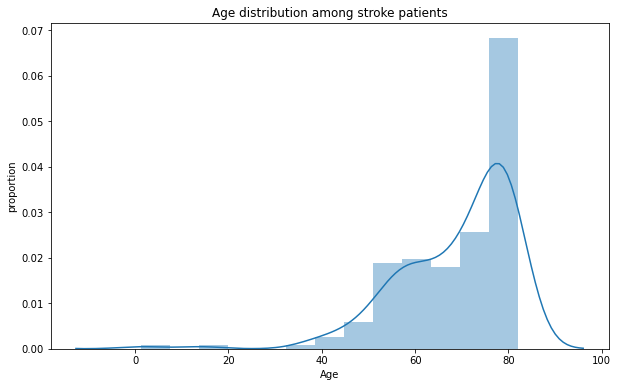

In [9]:
age_df = data_df[['age','stroke']]

# To ensure that the sample of patients obtained has equal chance of being in the respective age categories
def age_group_sorter(age):
    if age<= 20:
        return 'A'
    elif age<= 40:
        return 'B' 
    elif age<= 60:
        return 'C' 
    else:
        return 'D'

age_df['age_group'] = age_df['age'].apply(age_group_sorter)
A_df = age_df[age_df['age_group']=='A']   #1025 rows
B_df = age_df[age_df['age_group']=='B']   #1219 rows
C_df = age_df[age_df['age_group']=='C']   #1562 rows
D_df = age_df[age_df['age_group']=='D']   #1304 rows

equal_B_df = B_df.sample(n=1025)
equal_C_df = C_df.sample(n=1025)
equal_D_df = D_df.sample(n=1025)
equal_age_df = pd.concat([A_df, equal_B_df, equal_C_df, equal_D_df])

equal_age_stroke_df = equal_age_df[equal_age_df['stroke']==1]

# Plotting
plt.figure(figsize=(10,6))
sns.distplot(equal_age_stroke_df['age'])
plt.xlabel('Age')
plt.ylabel('proportion')
plt.title('Age distribution among stroke patients')
plt.show()

<div class="alert alert-block alert-info">
<b>Insights:</b><br> The risk of stroke increases as age increases. It increases exponentially from age 20+ onwards and peaks at around age 80.
</div>

<h3> V. BMI Risk </h3>

Using <b> distribution plot </b> to investigate the distribution of `bmi` among stroke patients.

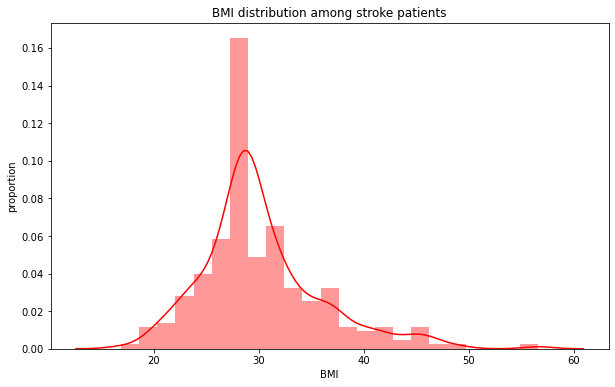

In [10]:
bmi_df = data_df[['bmi','stroke']]

# To ensure that the sample of patients obtained has equal chance of being in the respective bmi categories
def bmi_sorter(bmi):
    if bmi<18.5:
        return 'underweight'
    elif bmi<25:
        return 'normal'
    elif bmi<30:
        return 'overweight'
    else:
        return 'obese'
    
bmi_df['bmicat'] = bmi_df['bmi'].apply(bmi_sorter)
underweight_df = bmi_df[bmi_df['bmicat']=='underweight']   #337 rows
normal_df = bmi_df[bmi_df['bmicat']=='normal']   #1243 rows
overweight_df = bmi_df[bmi_df['bmicat']=='overweight']   #1610 rows
obese_df = bmi_df[bmi_df['bmicat']=='obese']    #1920 rows

equal_normal_df = normal_df.sample(n=337)
equal_overweight_df = overweight_df.sample(n=337)
equal_obese_df = obese_df.sample(n=337)
equal_bmi_df = pd.concat([underweight_df,normal_df,overweight_df,obese_df])

equal_bmi_stroke_df = equal_bmi_df[equal_bmi_df['stroke']==1]

# Plotting
plt.figure(figsize=(10,6))
sns.distplot(equal_bmi_stroke_df['bmi'], color='red')
plt.xlabel('BMI')
plt.ylabel('proportion')
plt.title('BMI distribution among stroke patients')
plt.show()

<div class="alert alert-block alert-info">
<b>Insights:</b><br> The risk of stroke increases sharply as especially as BMI increases from the normal to overweight range, suggesting a higher risk of stroke for overweight patients.
</div>

<h3> VI. Average Glucose Level Risk </h3>

Using <b> box plot </b> to investigate the `avg_glucose_level` for both non-stroke and stroke patients

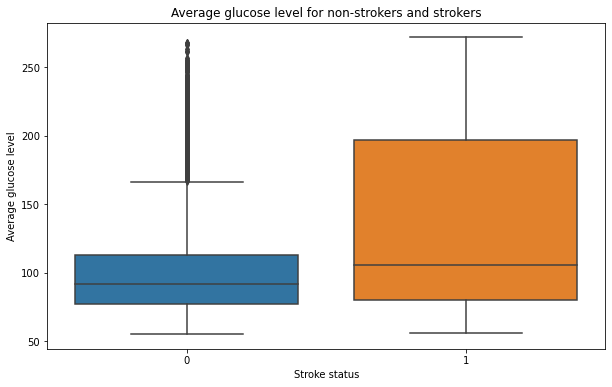

In [11]:
glucose_df = data_df[['avg_glucose_level', 'stroke']]

glucose_no_stroke_ser = glucose_df[glucose_df['stroke']==0]['avg_glucose_level']
glucose_stroke_ser = glucose_df[glucose_df['stroke']==1]['avg_glucose_level']

# Plotting
plt.figure(figsize=(10,6))
sns.boxplot(
    data=[glucose_no_stroke_ser, glucose_stroke_ser]
)
plt.xlabel('Stroke status')
plt.ylabel('Average glucose level')
plt.title('Average glucose level for non-strokers and strokers')
plt.show()

<div class="alert alert-block alert-info">
<b>Insights:</b><br> 
- The interquartile range of average glucose level for stroke patients is much wider, suggesting that it is more common for stroke patients to have a higher average glucose level. This potentially means that average glucose level increases the risk of stroke. <br>
- However, median average glucose level for stroke patients is only slightly higher than that for non-stroke patients.
</div>

<h2> D. Machine Learning for Stroke Prediction </h2>

- Using sklearn's inbuilt ML algorithms, we are able to make calculated predictions on stroke, given the input parameters (the 7 variables/possible risk factors) for each patient.
- As we are dealing with a binary dependent variable, `stroke`, we have identified two suitable ML models - Logistic Regression & Decision Tree, to achieve our predictions.
- We will also be comparing the performance results of the two models.

<h3> I. Data Preparation for ML </h3>

- Even after eliminating rows with undesired values, there is still a large discrepancy in the number of stroke patients in our data (202) as compared to non-stroke patients (3363). <br>
- To solve this issue, we decided to draw a random sample of 200 each from both stroke and non-stroke data so that our regression model will be trained in both cases of data a fair manner.

In [12]:
# drop rows with 'gender' == 'Other' and 'smoking_status' == 'Unknown'
no_stroke_df = data_df[data_df['stroke'] == 0]
stroke_df = data_df[data_df['stroke'] == 1]

gender_cond = data_df['gender'] != 'Other'
smoking_cond = data_df['smoking_status'] != 'Unknown'

stroke_df[gender_cond & smoking_cond].shape #202 rows
no_stroke_df[gender_cond & smoking_cond].shape #3363 rows

ml_df = pd.concat([stroke_df[gender_cond & smoking_cond].sample(n=200), no_stroke_df[gender_cond & smoking_cond].sample(n=200)])

<b> One-Hot Encoding for `gender` and `smoking_status` </b> <br>
- This is necessary for our logistic regression model to work and the coefficients computed later on to be interpreted easily.
- For `gender`, we encode `Male` to be 0 and `Female` to be 1.
- For `smoking`, we encode `never smoked` to be 0 and `formerly smoked`/`smokes` to be 1.
- The drawback from combining both `formerly smoked` and `smokes` categories is compensated from the earlier analysis, which we saw a greater proportion of formerly smoked patients suffering from stroke, as compared to patients who are still smoking.

In [13]:
def gender_encoding(gender):
    if gender == 'Male':
        return 0
    else:
        return 1

def smoking_encoding(status):
    if status == 'never smoked':
        return 0
    else:
        return 1

ml_df['gender_code'] = ml_df['gender'].apply(gender_encoding)
ml_df['smoking_status_code'] = ml_df['smoking_status'].apply(smoking_encoding)

<b> Final Dataset for ML </b>
- Our final dataset for our logistic regression model consists of 400 rows, a relatively small dataset.
- There are 8 columns, representing 7 independent variables (risk factors of stroke) and 1 dependent variable, `stroke`

In [14]:
ml_df = ml_df.drop(columns=['gender','smoking_status'], axis=1)
ml_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_code,smoking_status_code
120,58.0,0,0,59.86,28.0,1,1,1
6,74.0,1,1,70.09,27.4,1,0,0
205,78.0,0,0,106.74,33.0,1,1,1
131,78.0,1,0,130.54,20.1,1,1,0
45,76.0,1,0,243.58,33.6,1,0,0
...,...,...,...,...,...,...,...,...
3248,35.0,1,0,94.20,34.4,0,1,1
3210,63.0,0,0,95.29,31.6,0,0,1
2863,58.0,0,0,73.36,36.6,0,1,1
757,19.0,0,0,84.31,31.8,0,0,0


- With the 7 independent variables, we detect for multicollinearity to drop variables if necessary.

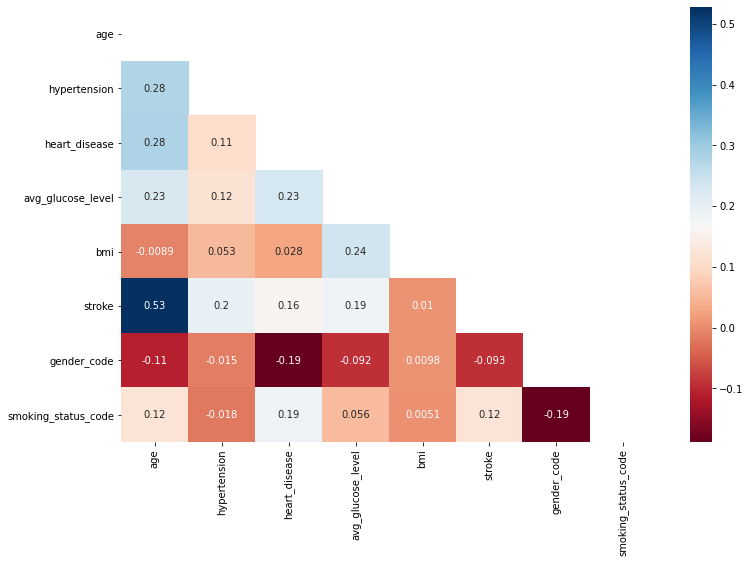

In [15]:
plt.figure(figsize=(12,8))

mask = np.zeros_like(ml_df.corr())
mask[np.triu_indices_from(mask)] = 1

sns.heatmap(
    ml_df.corr(),
    cmap='RdBu', annot=True,
    mask=mask
)

plt.show()

<div class="alert alert-block alert-info">
<b>Insights:</b> <br>
- While the correlation coefficients for all the variables relative to one another is considered small, we noticed an unusually high correlation between age and stroke compared to others. <br>
- In comparison to others, higher correlation coefficients are also obtained between age and illnesses (hypertension, heart_disease), and between gender_code and smoking_status_code. <br>
- i.e. An older person is more likely to suffer from hypertension/heart disease, and males are more likely to be smokers/former smokers than females.
</div>

In [16]:
ml_x = ml_df[['age', 'gender_code', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','smoking_status_code']]
ml_y = ml_df['stroke']

- Finally, we will do a simple train/test split to be used in our LR and decision tree models later.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(ml_x, ml_y, random_state=42, test_size=0.2)

<h3> II. Logistic Regression (LR) Model </h3>

In [18]:
stroke_lr = LogisticRegression()

stroke_lr.fit(X_train, y_train)

LogisticRegression()

<h3> LR Training Results </h3>

<u><b>LR Parameter Values</b></u> <br>

In [19]:
print('Intercept =', stroke_lr.intercept_)
print('Coefficients =', stroke_lr.coef_)

Intercept = [-5.81205478]
Coefficients = [[0.07640966 0.00596236 0.35181371 0.14836161 0.00285177 0.01953828
  0.27190825]]


<u><b>Interpretation of Coefficients of LR</b></u> <br>

In [156]:
# Run the following code to obtain the interpretations for each risk factor

In [20]:
coef_list = stroke_lr.coef_[0]

continuous_var = ['age', 'avg_glucose_level', 'bmi']
continuous_coef = [coef_list[0], coef_list[4], coef_list[5]]
discrete_coef = [coef_list[1], coef_list[2], coef_list[3], coef_list[6]]
n = 0

print('--------------------------------------------------------')
print('For continuous variables - age, avg_glucose_level, bmi')
print('--------------------------------------------------------')
for factor in continuous_var:
    print('For every one unit change in', factor, ', the log odds of a stroke (vs. no stroke) increases by', \
        continuous_coef[n], ', i.e. there is a', str(round((np.exp(continuous_coef[n])-1)*100,2)), '% increase in the odds', \
          'of having a stroke.')
    print()
    n+=1

print('----------------------------------------------------------------------------------------')
print('For discrete variables - gender_code, hypertension, heart_disease, smoking_status_code')
print('----------------------------------------------------------------------------------------')
print('For gender_code, the log odds of a stroke (vs. no stroke) is', discrete_coef[0], 'higher for females than', \
      'males, i.e. females have', str(round((np.exp(discrete_coef[0])-1)*100,2)), '% more odds of having a', \
      'stroke compared to males.')
print()
print('For hypertension, the log odds of a stroke (vs. no stroke) is', discrete_coef[1], 'higher for hypertension patients', \
      ', i.e. they have', str(round((np.exp(discrete_coef[1])-1)*100,2)), '% more odds of having a', \
      'stroke.')
print()
print('For heart_disease, the log odds of a stroke (vs. no stroke) is', discrete_coef[2], 'higher for heart disease patients', \
      ', i.e. they have', str(round((np.exp(discrete_coef[2])-1)*100,2)), '% more odds of having a', \
      'stroke.')
print()
print('For smoking_status, the log odds of a stroke (vs. no stroke) is', discrete_coef[3], 'higher for patients who smoke/formerly smoked', \
      ', i.e. they have', str(round((np.exp(discrete_coef[3])-1)*100,2)), '% more odds of having a', \
      'stroke.')

--------------------------------------------------------
For continuous variables - age, avg_glucose_level, bmi
--------------------------------------------------------
For every one unit change in age , the log odds of a stroke (vs. no stroke) increases by 0.07640965846553611 , i.e. there is a 7.94 % increase in the odds of having a stroke.

For every one unit change in avg_glucose_level , the log odds of a stroke (vs. no stroke) increases by 0.0028517740929390333 , i.e. there is a 0.29 % increase in the odds of having a stroke.

For every one unit change in bmi , the log odds of a stroke (vs. no stroke) increases by 0.0195382768676469 , i.e. there is a 1.97 % increase in the odds of having a stroke.

----------------------------------------------------------------------------------------
For discrete variables - gender_code, hypertension, heart_disease, smoking_status_code
----------------------------------------------------------------------------------------
For gender_code, the lo

<h3> III. Decision Tree Model </h3>

In [21]:
from sklearn.tree import DecisionTreeClassifier

# growing the tree
stroke_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
stroke_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<h3>Decision Tree Training Results</b></h3>

<u> <b> Feature Importance </b> </u>

[0.44088702 0.03635953 0.01499706 0.00236009 0.26821552 0.19386811
 0.04331267]


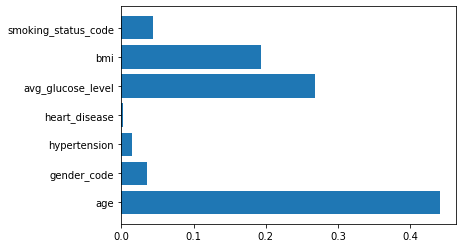

In [22]:
fig, ax = plt.subplots()
ax.barh(ml_x.columns, stroke_tree.feature_importances_)
print(stroke_tree.feature_importances_)

<div class="alert alert-block alert-info">
<b>Insights:</b><br> According to our decision tree model, the three most important risk factors of stroke are <b>high BMI</b>, <b>high average glucose level</b> and <b>old age</b>.
</div>

<h3> IV. Comparison of Performance Results between LR Model and Decision Tree Model </h3>

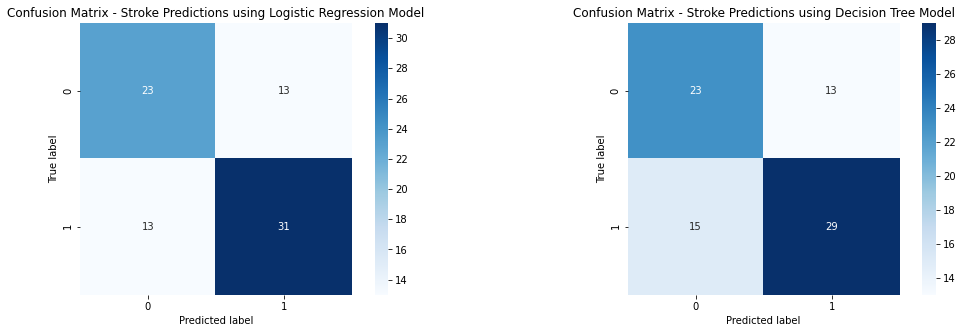

--------------------------------
LR Results
--------------------------------
Accuracy = 0.675
Precision = 0.7045454545454546

--------------------------------
Decision Tree Results
--------------------------------
Accuracy = 0.65
Precision = 0.6904761904761905


In [23]:
#----------------------------------------------------------------------------------------------------------

# LR Prediction Results
lr_predict = stroke_lr.predict(X_test)
lr_cm = confusion_matrix(y_test,lr_predict)

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(18,5))
ax1 = ax[0]
ax2 = ax[1]

# Plotting confusion matrix for logistic regression model
sns.heatmap(lr_cm, annot=True, square=True, cmap=plt.cm.Blues, ax=ax1)
ax1.set_ylim(2,0)
ax1.set_xlim(0,2)
ax1.set_ylabel('True label')
ax1.set_xlabel('Predicted label')
ax1.set_title('Confusion Matrix - Stroke Predictions using Logistic Regression Model', fontsize=12)

#----------------------------------------------------------------------------------------------------------

# Decision Tree predictions
tree_pred = stroke_tree.predict(X_test)
tree_cm = confusion_matrix(y_test, tree_pred)

# Plotting confusion matrix for decision tree model
sns.heatmap(tree_cm, annot=True, square=True, cmap=plt.cm.Blues, ax=ax2)
ax2.set_ylim(2,0)
ax2.set_xlim(0,2)
ax2.set_ylabel('True label')
ax2.set_xlabel('Predicted label')
ax2.set_title('Confusion Matrix - Stroke Predictions using Decision Tree Model', fontsize=12)

plt.show()

#----------------------------------------------------------------------------------------------------------

# LR Performance Results:
lr_TP = lr_cm[1][1]
lr_TN = lr_cm[0][0]
lr_FP = lr_cm[0][1]
lr_FN = lr_cm[1][0]
lr_accuracy = (lr_TP+lr_TN) / (lr_TP+lr_TN+lr_FP+lr_FN)
lr_precision = lr_TP / (lr_TP + lr_FP)

print('--------------------------------')
print('LR Results')
print('--------------------------------')
print('Accuracy =', lr_accuracy)
print('Precision =', lr_precision)
print()

#----------------------------------------------------------------------------------------------------------

# Decision Tree Performance Results:
tree_TP = tree_cm[1][1]
tree_TN = tree_cm[0][0]
tree_FP = tree_cm[0][1]
tree_FN = tree_cm[1][0]
tree_accuracy = (tree_TP+tree_TN) / (tree_TP+tree_TN+tree_FP+tree_FN)
tree_precision = tree_TP / (tree_TP + tree_FP)

print('--------------------------------')
print('Decision Tree Results')
print('--------------------------------')
print('Accuracy =', tree_accuracy)
print('Precision =', tree_precision)

<h3> V. Further Evaluation of ML models - using K-Fold Cross-Validation </h3>

- In order to cope with our small dataset, we can improve our LR and decision tree models with k-fold train/test split.
- K-fold procedure enables us to maximise the use of our limited data in training/testing. It will also result in a less biased estimate of the skill of our logistic regression model as compared to a simple train/test split. <br>
<br>
- In the following codes, we will demonstrate the use of k-fold for our LR model.
- Using a value of `k=10`, we split the dataset into 10 folds, with the size of each set (fold) being 40 and ratio of train/test size being 9:1 for each iteration. 
- The KFold’s `shuffle` parameter is also set to be `True` because our dataset segregates the stroke and non-stroke rows distinctly.

In [24]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

k_results = []

k = 1

for train_index, test_index in kf.split(ml_x):
    X_train, X_test = ml_x.iloc[train_index], ml_x.iloc[test_index]
    y_train, y_test = ml_y.iloc[train_index], ml_y.iloc[test_index]
    
    stroke_lr = LogisticRegression()
    stroke_lr.fit(X_train, y_train)
    
    y_predicted =  stroke_lr.predict(X_test)
    
    k_results.append({
        'coefficients': stroke_lr.coef_,
        'accuracy': accuracy_score(y_test, y_predicted)
    })
    
    k += 1

<h3>K-Fold Results</b></h3>

<u><b>Coefficients</b></u>

- The following results are the coefficient values obtained for each fold.

In [25]:
coeff_list = [list((k_results[0]['coefficients'][0]))]

for fold in k_results[1:]:
    coeff_list.append(list(fold['coefficients'][0]))

coeff_df = pd.DataFrame(coeff_list, columns=ml_x.columns,index=[1,2,3,4,5,6,7,8,9,10])
coeff_df.index.name = 'Fold'

coeff_avg_df = pd.DataFrame(coeff_df.mean(),columns=['mean coefficient value'])

display(coeff_df, coeff_avg_df)

,age,gender_code,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_code
Fold,,,,,,,
1,0.074825,0.030668,0.398083,-0.038556,0.003312,0.013700,0.347779
2,0.073213,-0.160966,0.295261,-0.107991,0.002276,0.017389,0.360410
3,0.075000,-0.240675,0.308074,-0.125006,0.003217,0.003893,0.322689
4,0.070426,-0.095075,0.282664,-0.127909,0.002818,0.004562,0.341501
5,0.071457,-0.196021,0.292400,-0.385634,0.001941,0.020359,0.380005
6,0.070249,-0.054834,0.177647,-0.201456,0.002095,0.009037,0.321149
7,0.069674,-0.016366,0.301412,-0.283817,0.001927,0.019079,0.377846
8,0.074402,-0.144383,0.366000,-0.256860,0.002885,0.008987,0.386982
9,0.067227,-0.147760,0.377723,-0.216483,0.003884,0.014615,0.581916


,mean coefficient value
age,0.071912
gender_code,-0.116116
hypertension,0.335392
heart_disease,-0.171583
avg_glucose_level,0.002705
bmi,0.011925
smoking_status_code,0.379501


<u><b>Model Performance</b></u>

<b> Averaging results across 10 folds... </b>

In [26]:
accuracy_list = []

for fold in k_results:
    accuracy_list.append(fold['accuracy'])
    
accuracy_df = pd.DataFrame(accuracy_list, columns=['accuracy_score'],index=[1,2,3,4,5,6,7,8,9,10])
accuracy_df.index.name = 'Fold'

display(accuracy_df)
print('Accuracy Score:')
print('mean =', np.mean(accuracy_list))
print('std =', np.std(accuracy_list))

,accuracy_score
Fold,
1,0.600
2,0.775
3,0.700
4,0.725
5,0.775
6,0.825
7,0.825
8,0.625
9,0.750


Accuracy Score:
mean = 0.73
std = 0.0722841614740048


<b> Using `cross_val_predict`... </b> <br>
- Instead of averaging the results across 10 folds, another way to evaluate the results of the k-fold LR model is to generate cross-validated estimates for each input data point.

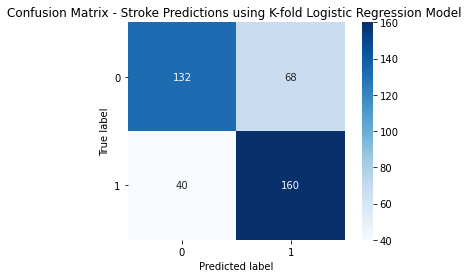

K-fold LR Results:
Accuracy = 0.73
Precision = 0.7017543859649122


In [27]:
stroke_lr = LogisticRegression()
y_pred = cross_val_predict(stroke_lr, ml_x, ml_y, cv=kf, n_jobs=-1)
cm = confusion_matrix(ml_y, y_pred)

# Plot confusion matrix
sns.heatmap(cm, fmt='.0f', annot=True, square=True, cmap=plt.cm.Blues)
plt.ylim = (2,0)
plt.xlim = (0,2)
plt.yticks(rotation=0)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Stroke Predictions using K-fold Logistic Regression Model ')
plt.show()

# Performance Results:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accuracy = (TP+TN) / (TP+TN+FP+FN)
precision = TP / (TP + FP)

print('K-fold LR Results:')
print('Accuracy =', accuracy)
print('Precision =', precision)

<h3> VI. Closing </h3>

This concludes our brief analysis on the possible risk factors of `stroke`. We will proceed with an evaluation on our methods.

After we have examined how each risk factor relates to the occurence of stroke using data visualisation tools (section B), we explored various machine learning techniques to perform a multivariate analysis (section C).

Upon performing logistic regression, we realised a discrepancy between the intepretation of coefficient of a factor and its actual analysis. Through logistic regression, the odds of a female having a stroke is greater than that of a male. This is in contrast to our earlier analysis which shows that a greater proportion of stroke patients are actually males. This reflects an issue with our coefficient values, which may be attributed to several reasons:

- <b>Issue 1:</b> mix of both discrete and continuous variables used in our analysis <br>
- <b>Issue 2:</b> small sample size of 400 due to insufficient data of stroke patients <br>
- <b>Issue 3:</b> unequal distribution of `gender` with more females fitted in our machine learning models <br>

Evidently, our logistic regression model has its flaws. We can improve it by possibly doing:

- <b>Solution 1:</b> a separate logistic regression for continuous and discrete variables  (tackle issue 1) <br>
- <b>Solution 2:</b> Gathering data for a greater number of stroke patients such that our sample size can be scaled for model to be trained sufficiently in both stroke and non-stroke patients (tackle issue 2) <br>
- <b>Solution 3:</b> filtering our dataframe such that there is an equal number of males and females before performing the regression (tackle issue 3) <br>

From tracking the feature importances of our variables, the 3 most defining variables in causing stroke are `age`, `bmi` and `glucose level`. We cannot use the coefficients from our logistic regression to compare as each data has a different scale. One way to counter this is to use `MinMaxScaler` to ensure that each unit change in the variables are proportionate. However when compared to our initial data analysis, we see some correspondence in the feature importance of variables. The distribution plots of age and BMI show a significant difference in proportion of stroke patients across different `age` and `bmi`, as compared to less significant changes in `smoking_status` and `gender`.

All in all, we learnt that our methodology is imperfect and there are always ways to further improve our accuracy by changing different parts of the process from the data collected to the methods used.

Moving on, possible future research efforts include creating a machine learning model predict the presence of stroke in people, after doing a proper and thorough analysis. This can help to identify people with a high risk of stroke from the general population from inputting simple information like `age` and `bmi` to perform testing on. Hopefully, this will help to conserve valuable medical resources from detecting the risk of stroke on people around the world.